
# Problem statemnet:

Bsgp is a Data science company, which has a stratergy of train and hire, after a preliminary skill test candidates are given training on data science. And after that they can join the Firm.

The problem here is few candidates leave the firm right after acquiring the capacity building.

PS: Is to predict wheather a given candidate will join the firm after training or not.

```



# ***Contents***

Exploratory Data Analysis



---


1.   Univarite Analysis
2.   Bivariate Analysis


Pre-processing


---



1.  Qualitative Nominal and Ordinal
2.  Quantitative Discrete and Continuous

Model Building



---



1.   Logistic Regression Model
1.   SVM model
2.   SVM with Kernel
2.   KNN
2.   Random Forest Model
5.   Artifical Neural Networks model


Hyper Parameter Turing (Kears Tuner)


---


1.  Selected optimal number of layers
2.  Selected Optimal number of neurons per layer
3.  Selected optimal activation for each neuron in a layer
4.  Optimal Cut off Identificaiton

Model Evaluation


---


1. Use ROC
2. AUC
3. precision
4. recall
5. accuracy
6. f1_score

Draw predictions


---


1. Used to preprocessed objects to preprocess the real data and predicted the results for the same.


In [ ]:
from google.colab import files

In [264]:
files.upload()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train_data = pd.read_csv('aug_train.csv')

In [8]:
train_data.shape

(18003, 14)

In [9]:
train_data.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0




---


# Checking Class Balance
Balanced dataset

---






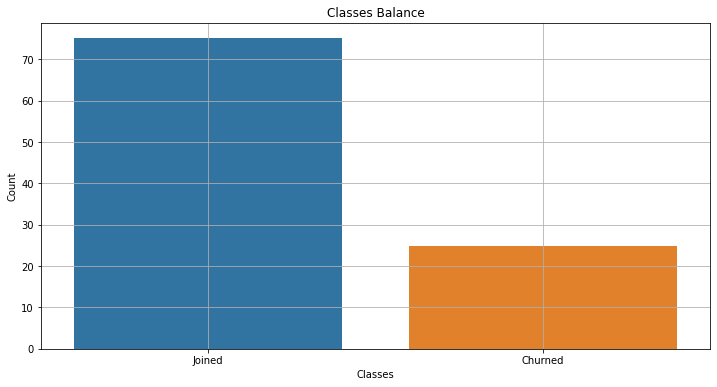

In [10]:
classes_percentage = (train_data['target'].value_counts()*100)/train_data.shape[0]
classes_percentage.index = ['Joined','Churned']
import seaborn as sns
plt.figure(figsize = (12,6))
sns.barplot(x = classes_percentage.index, y= classes_percentage)
plt.title("Classes Balance")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.grid()
plt.show()



---
# ***Exploratory Data Analysis***
---





# ***Checking the info of the dataset***

Since most of the columns are categorical (nominal) - dimensionality redcution will not hold good for feature selection

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18003 entries, 0 to 18002
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18003 non-null  int64  
 1   city                    18003 non-null  object 
 2   city_development_index  18003 non-null  float64
 3   gender                  13766 non-null  object 
 4   relevent_experience     18003 non-null  object 
 5   enrolled_university     17647 non-null  object 
 6   education_level         17574 non-null  object 
 7   major_discipline        15382 non-null  object 
 8   experience              17943 non-null  object 
 9   company_size            12419 non-null  object 
 10  company_type            12234 non-null  object 
 11  last_new_job            17605 non-null  object 
 12  training_hours          18003 non-null  int64  
 13  target                  18002 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# ***Sheer volume of the dataset comprises of categorical variables, and only the categorical variables have missing values. So imputing them could be hard because the percentage of missing values in them is high***



---
EDA on training hours, the idea is to check the interest of samples spread across different levels under each categorical feature.

EG: (Enrolled University [Categorical Ordinal Feature] : Describes the level of education of a candidate.

No of levels = 5 levels


level =  {school, graduate, PHD, Maters, primary school}) 


So say for instance if there is a huge variablity in the box plots of the levels of enrolled university, then we raise the question why and analyze based on that inspection. 

---





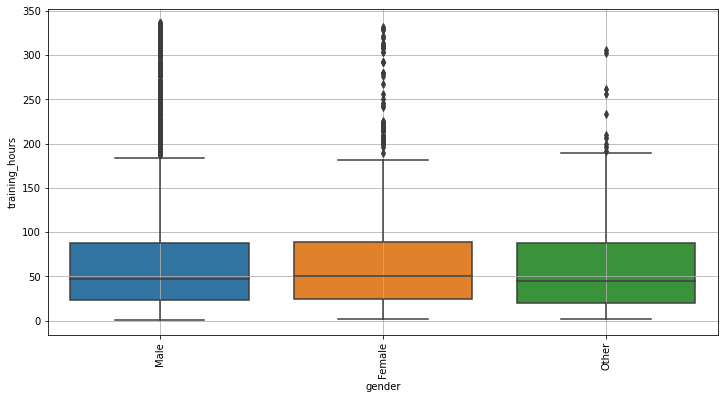

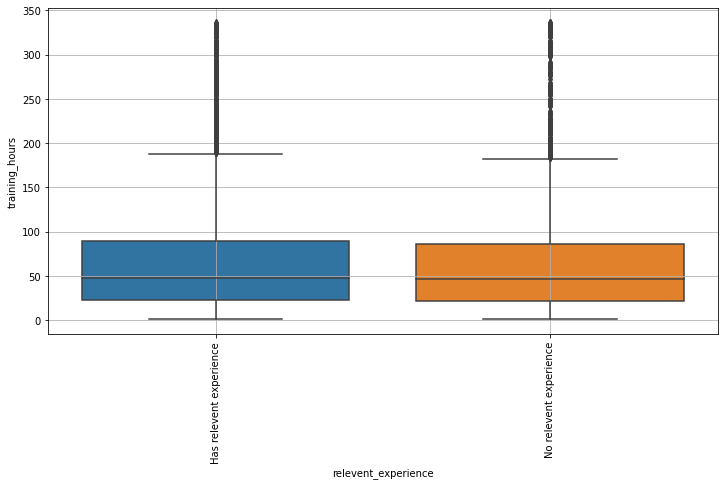

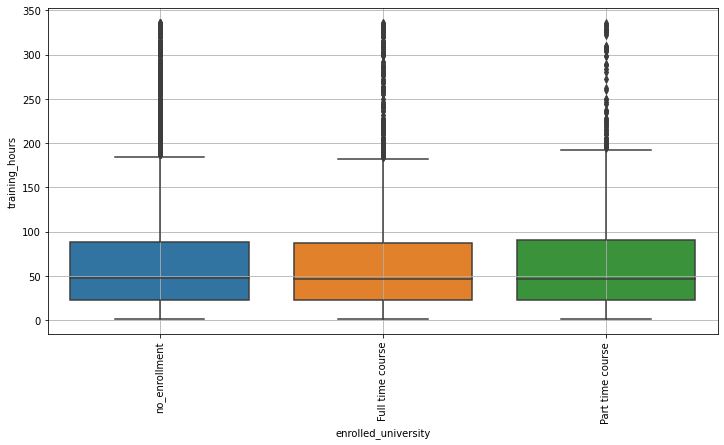

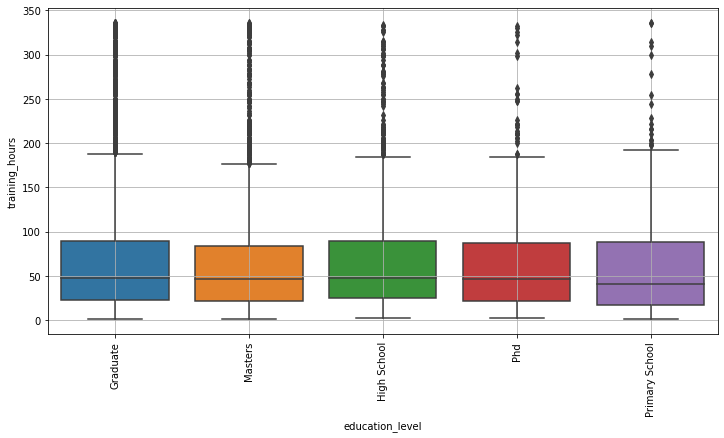

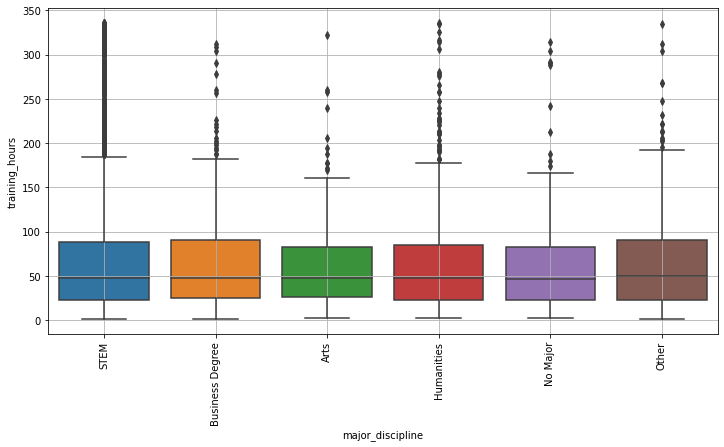

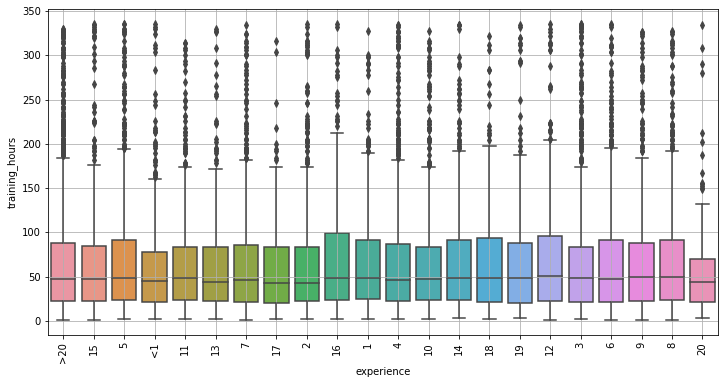

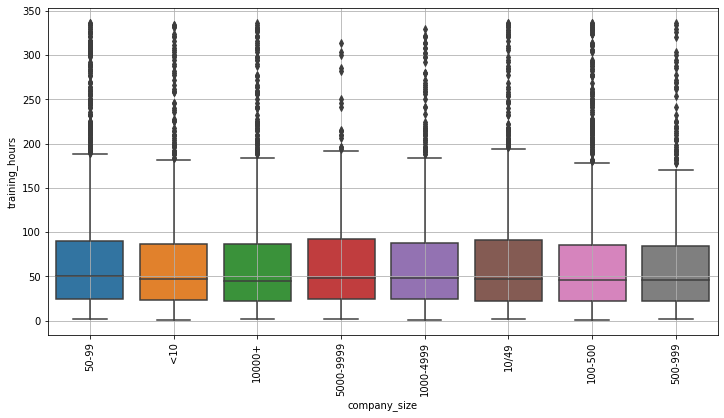

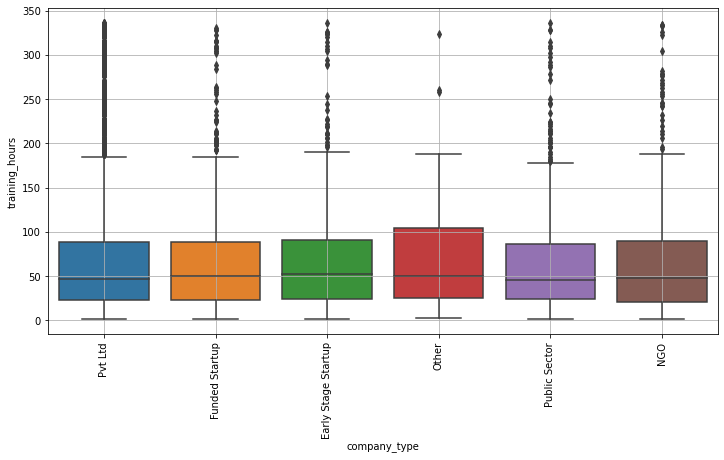

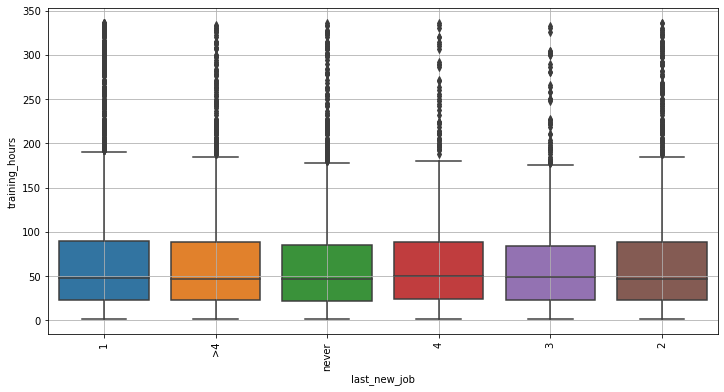

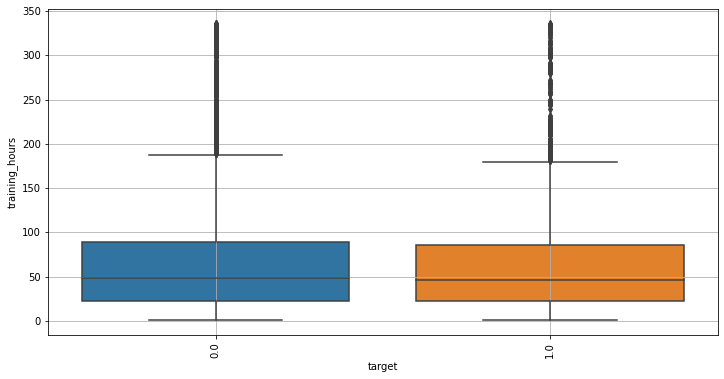

In [13]:
for i in train_data.drop(['enrollee_id','city_development_index','training_hours','city'], axis = 1).columns:
  plt.figure(figsize=(12,6))
  sns.boxplot(x = i, y = 'training_hours', data = train_data);
  plt.xticks(rotation = 90)
  plt.grid()
  plt.show()

In [14]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


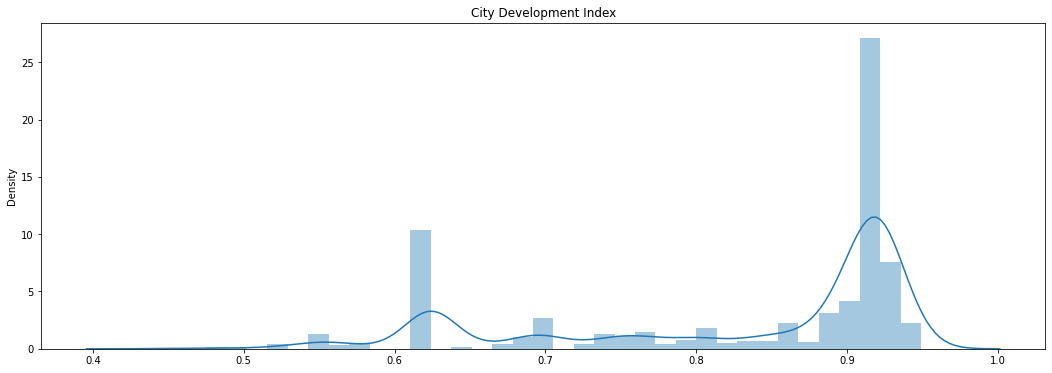

In [15]:
plt.figure(figsize =(18,6))
sns.distplot(x = train_data['city_development_index']);
plt.title('City Development Index')
plt.show()

In [16]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


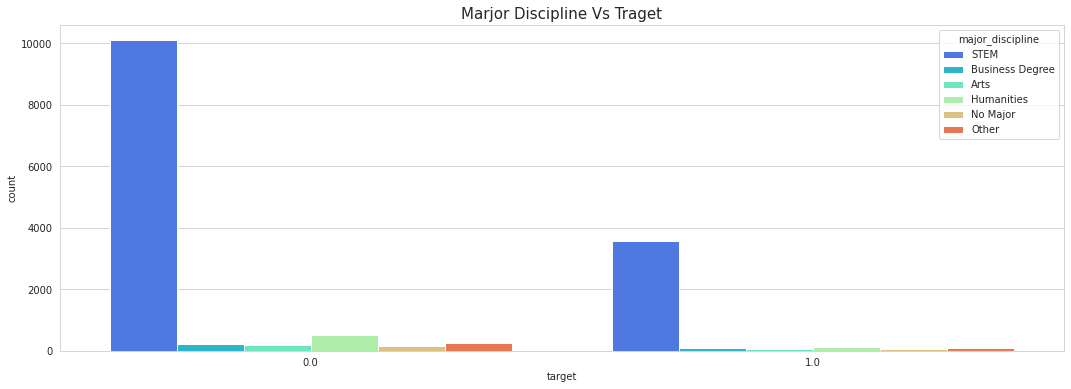

In [18]:
plt.figure(figsize = (18,6))
sns.set_style('whitegrid')
sns.countplot(x='target',hue='major_discipline',data=train_data,palette='rainbow');
plt.title("Marjor Discipline Vs Traget", fontsize = 15)
plt.show()

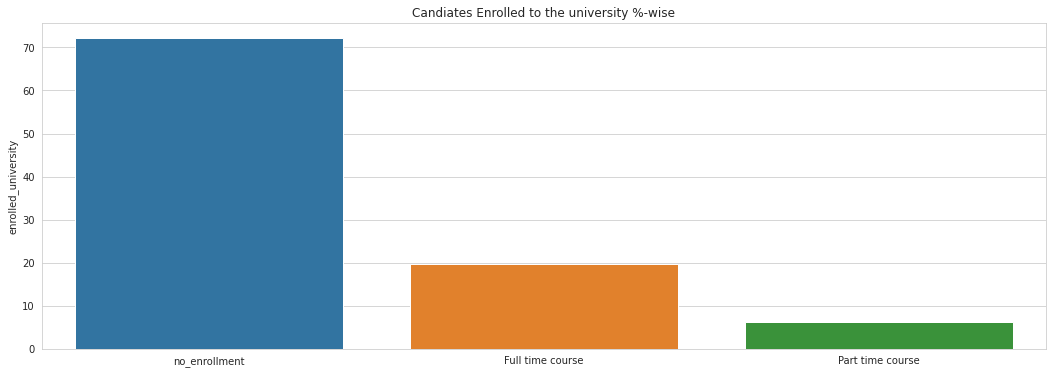

In [ ]:
# percentage wise split up
plt.figure(figsize = (18,6))
c = (train_data['enrolled_university'].value_counts()*100) /train_data.shape[0]
sns.barplot(x =c.index , y = c)
plt.title("Candiates Enrolled to the university %-wise")
plt.show()

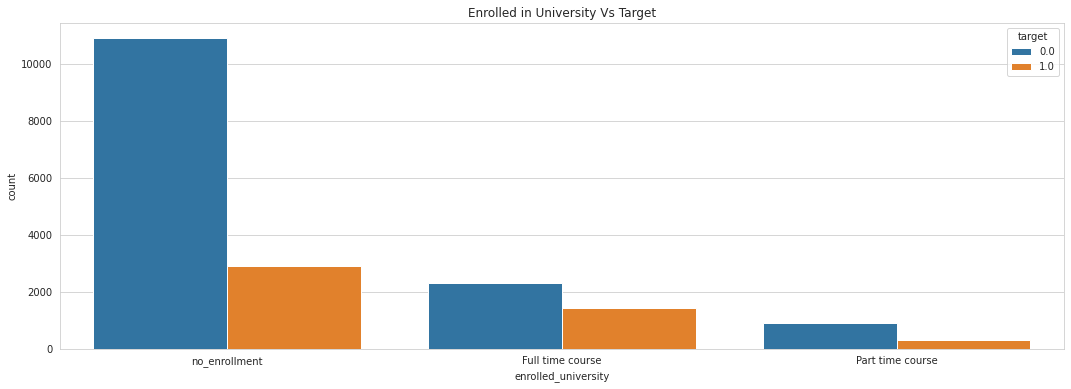

In [ ]:
plt.figure(figsize = (18,6))
sns.countplot(x = train_data['enrolled_university'], hue = train_data['target'], data = train_data)
plt.title("Enrolled in University Vs Target")
plt.show()

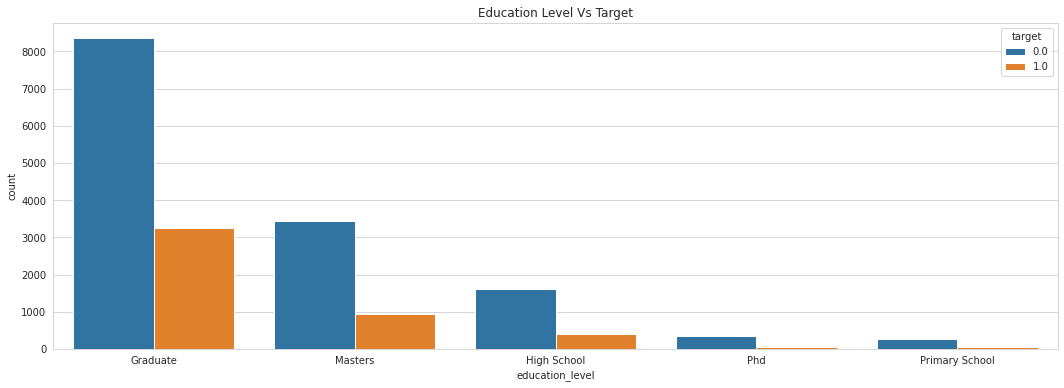

In [ ]:
# Education level
train_data['education_level'].value_counts()
plt.figure(figsize = (18,6))
sns.countplot(x = train_data['education_level'], hue = train_data['target'], data = train_data)
plt.title("Education Level Vs Target")
plt.show()

In [ ]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


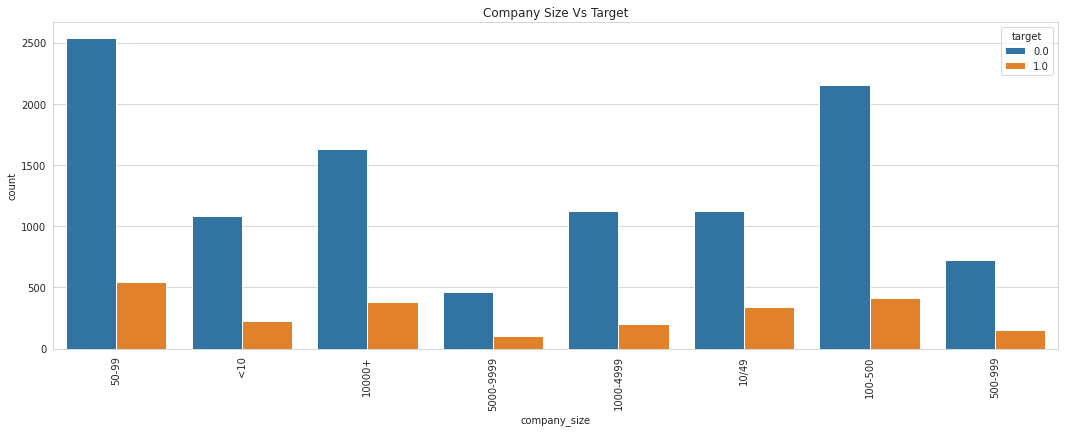

In [ ]:
plt.figure(figsize = (18,6))
sns.countplot(x = train_data['company_size'], hue = train_data['target'], data = train_data)
plt.title('Company Size Vs Target')
plt.xticks(rotation = 90)
plt.show()

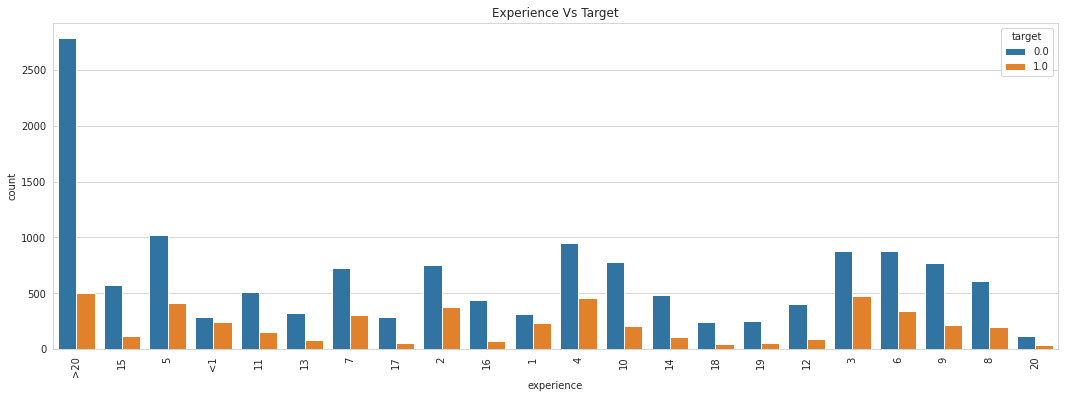

In [ ]:
train_data['experience'].value_counts()
plt.figure(figsize = (18,6))
sns.countplot(x = train_data['experience'], hue = train_data['target'], data = train_data)
plt.title('Experience Vs Target')
plt.xticks(rotation = 90)
plt.show()

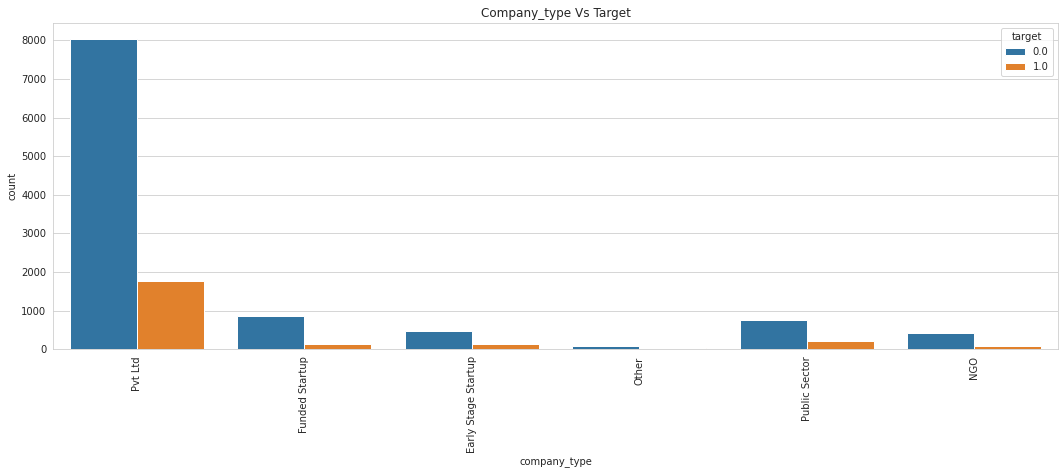

In [ ]:
train_data['company_type'].value_counts()
plt.figure(figsize = (18,6))
sns.countplot(x = train_data['company_type'], hue = train_data['target'], data = train_data)
plt.title('Company_type Vs Target')
plt.xticks(rotation = 90)
plt.show()

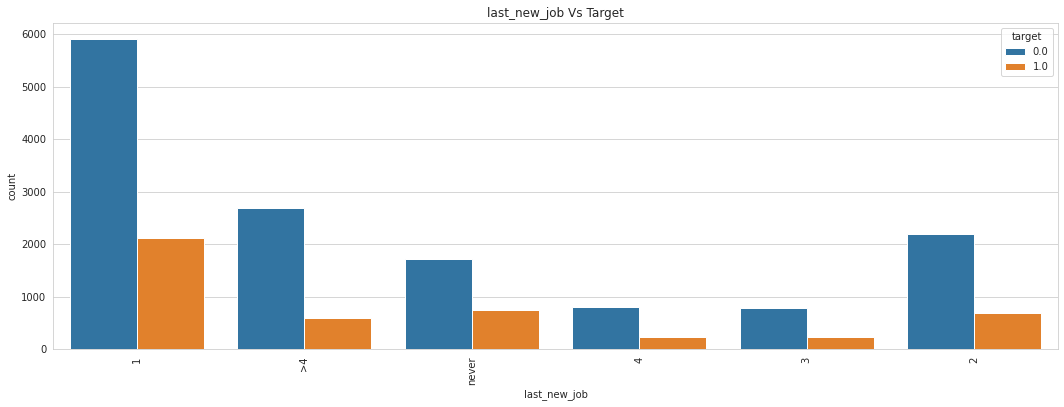

In [ ]:
train_data['last_new_job'].value_counts()
plt.figure(figsize = (18,6))
sns.countplot(x = train_data['last_new_job'], hue = train_data['target'], data = train_data)
plt.title('last_new_job Vs Target')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
churners = train_data[train_data['target'] == 1]
# Churners city wise
cities_with_high_churn = churners['city'].value_counts()[churners['city'].value_counts() > 10].index

train_data['city_development_index'][train_data['city'].isin(cities_with_high_churn)].describe()

count    17724.000000
mean         0.831597
std          0.124862
min          0.448000
25%          0.740000
50%          0.910000
75%          0.920000
max          0.939000
Name: city_development_index, dtype: float64

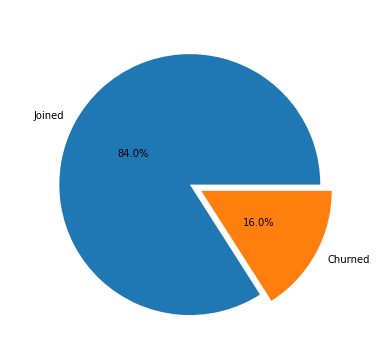

In [ ]:
high_city_dev_index_count = train_data[train_data['city_development_index']> 0.8]['target'].value_counts()
labels = ['Joined','Churned']
plt.figure(figsize =  (18,6))
plt.title("Churn rates in cities with high development index",color = 'white', fontsize = 15)
plt.pie(x=high_city_dev_index_count, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5 );
plt.show()

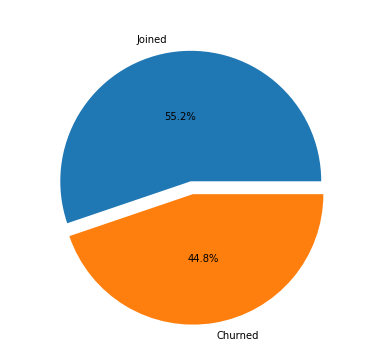

In [ ]:
low_city_dev_index_count = train_data[train_data['city_development_index']< 0.8]['target'].value_counts()
labels = ['Joined','Churned']
plt.figure(figsize =  (18,6))
plt.title("Churn rates in cities with low development index",color = 'white', fontsize = 15)
plt.pie(x=low_city_dev_index_count, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5 );
plt.show()

# ***Questioning***

We have a reason for pople to churn out on hight development cities, Since it's a better city better opportunities.

We don't know why 44.8% of people from under developed cites have churned.

Trying to explain that using the data

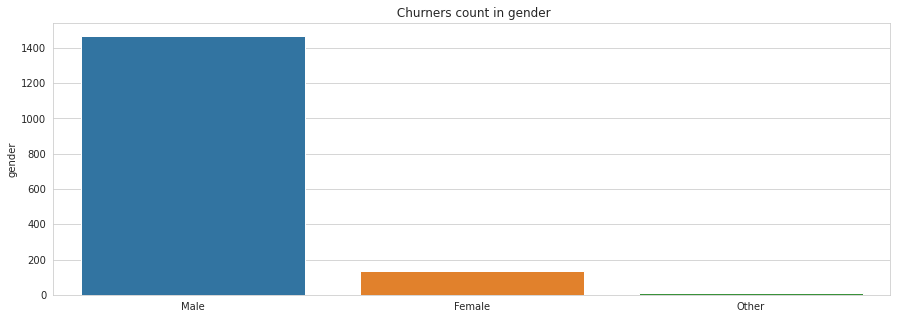

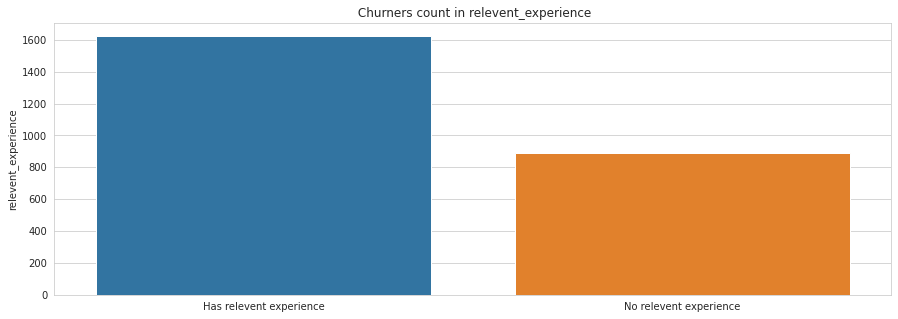

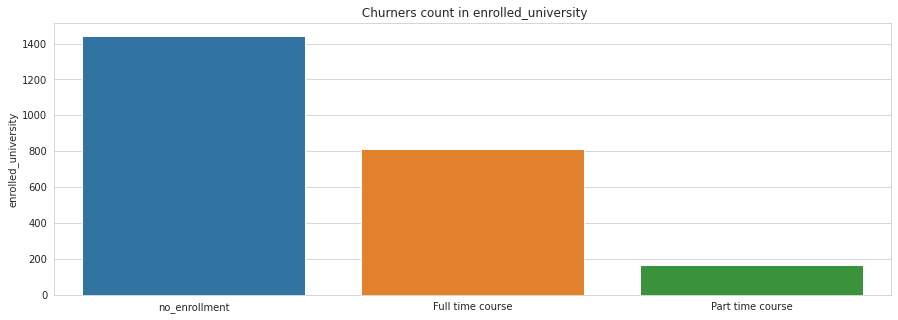

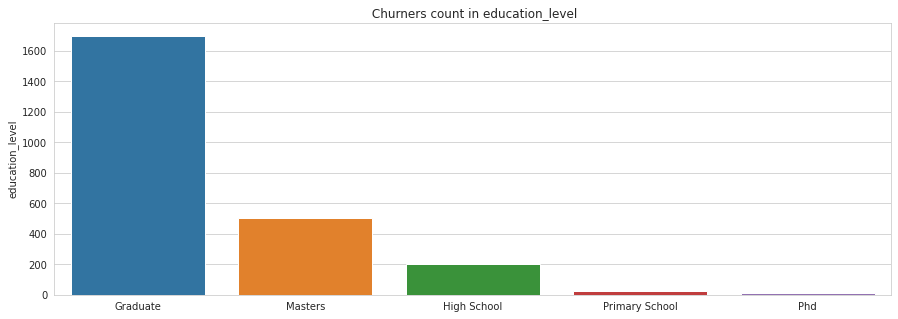

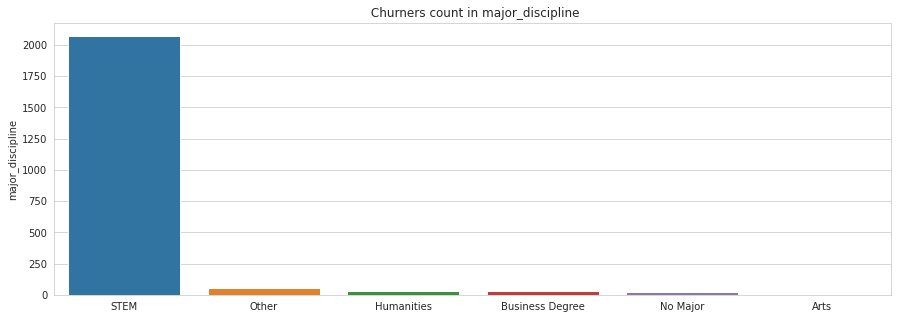

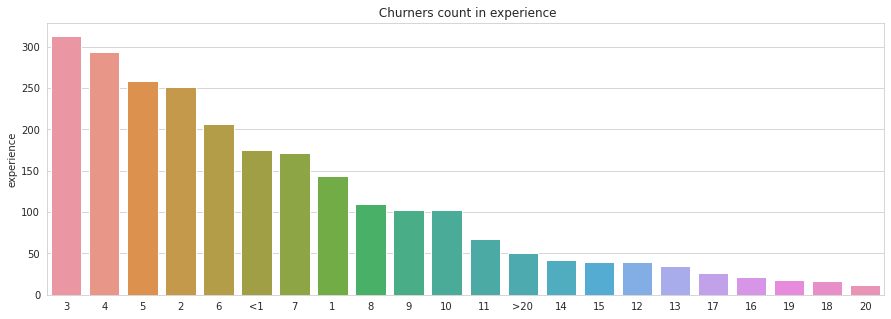

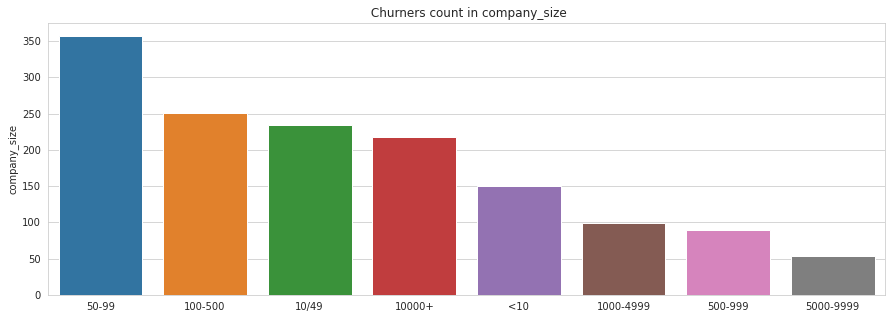

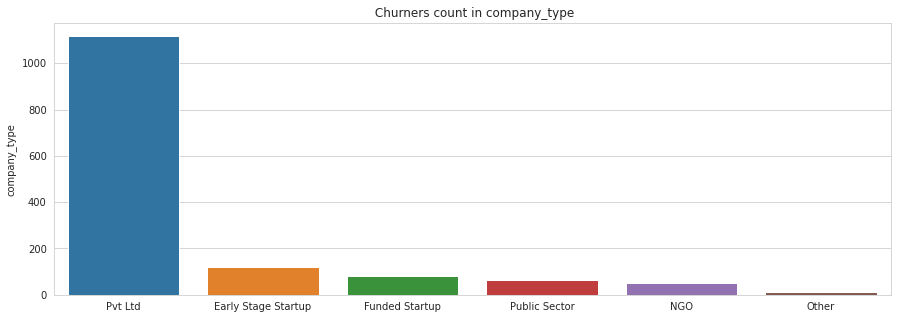

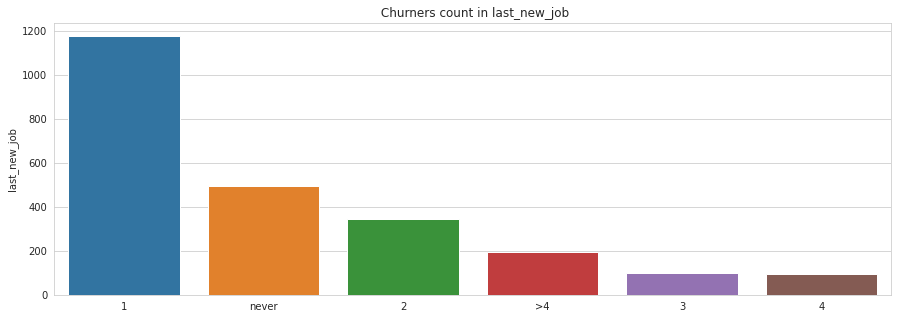

In [30]:
churners = train_data[train_data['target'] == 1]
low_index_city_churner = churners[churners['city_development_index'] < 0.8]
objs = low_index_city_churner.select_dtypes(include = [np.object]).drop('city', axis = 1)
for i in objs.columns:
  plt.figure(figsize= (15,5))
  plt.title(" Churners count in {}".format(i))
  sns.barplot(x = objs[i].value_counts().index, y = objs[i].value_counts())
  plt.show()
  print("\n")

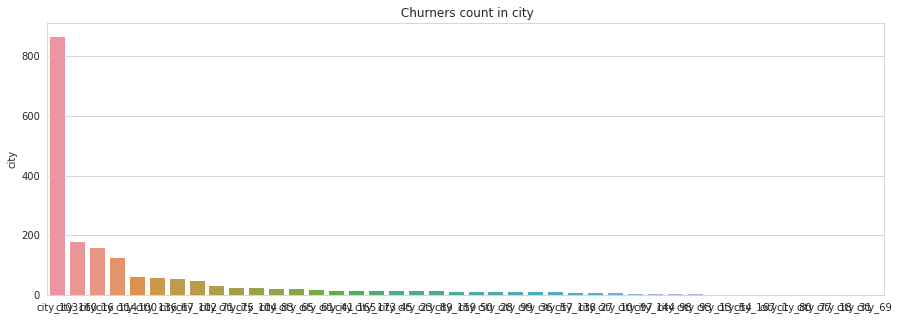

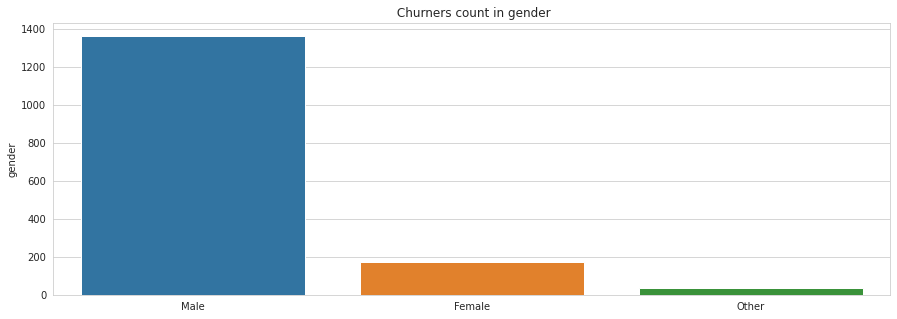

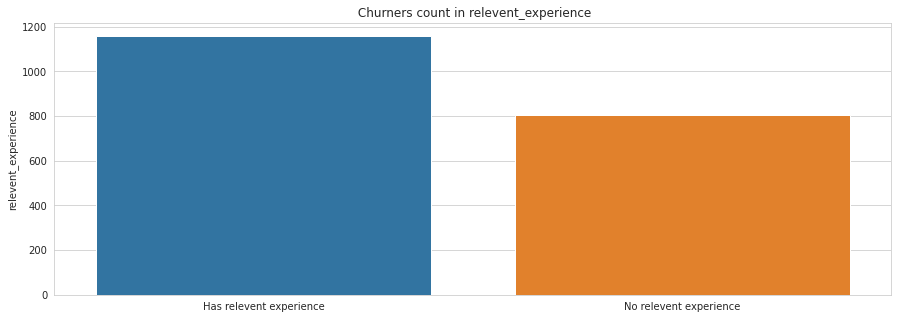

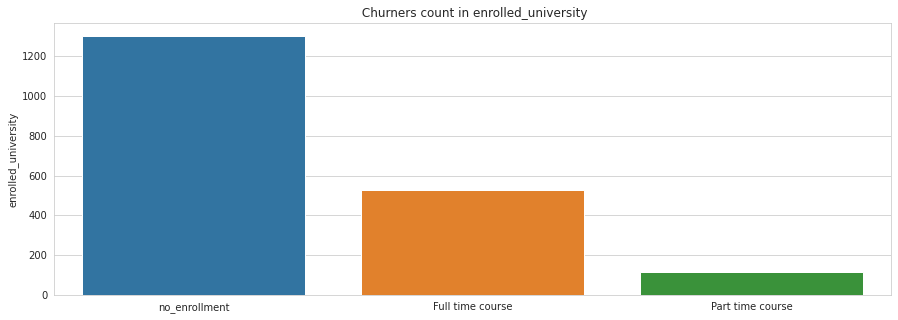

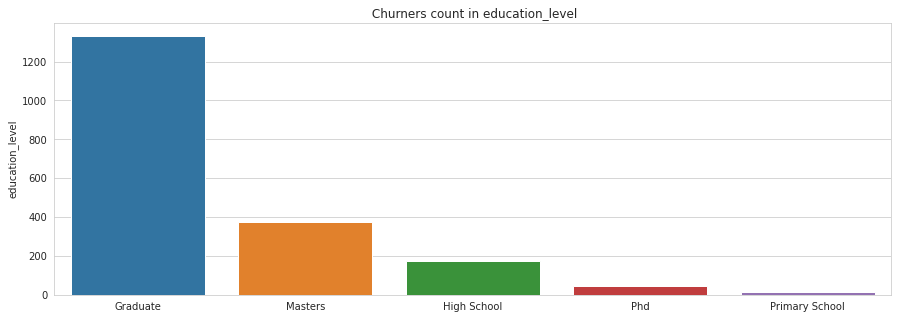

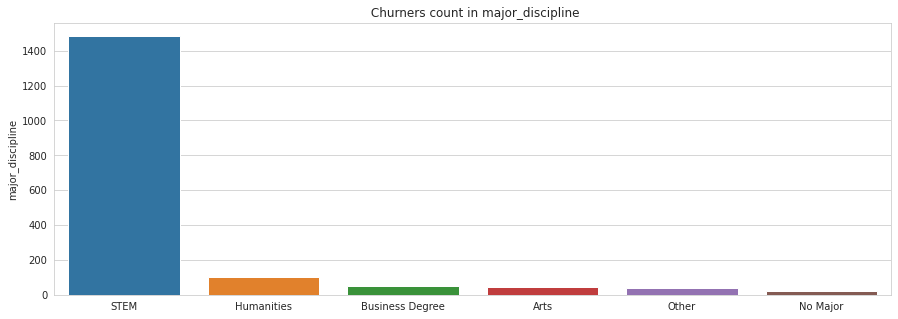

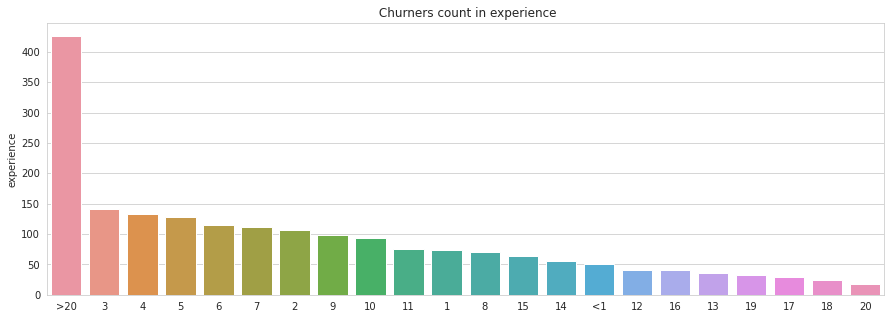

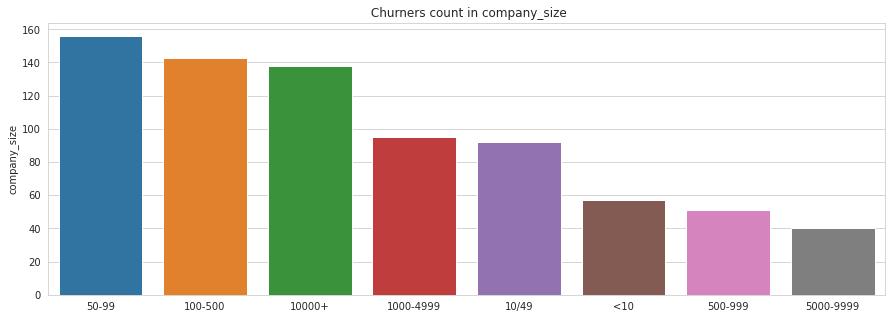

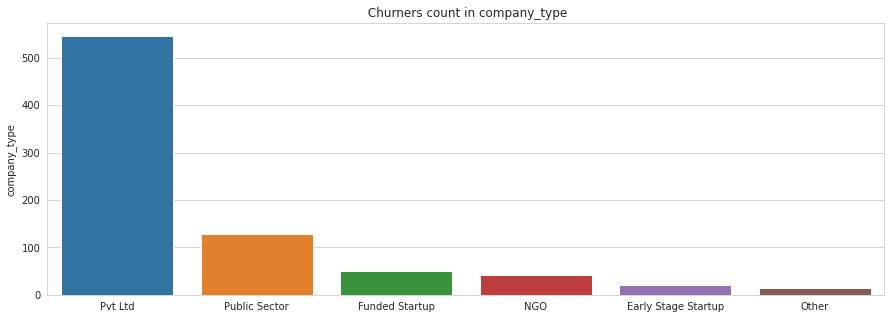

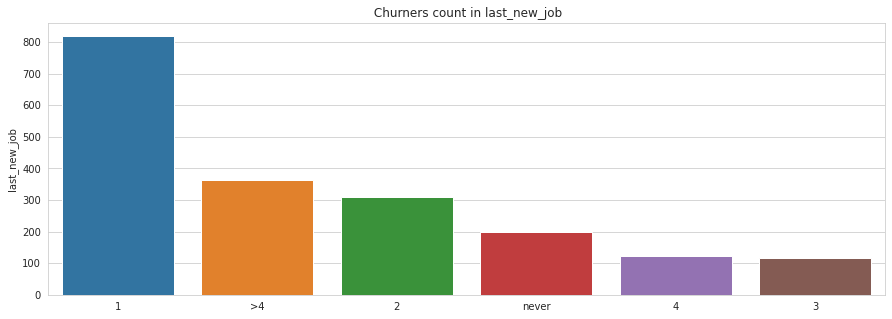

In [33]:
low_index_city_churner = churners[churners['city_development_index'] > 0.8]
objs = low_index_city_churner.select_dtypes(include = [np.object])
for i in objs.columns:
  plt.figure(figsize= (15,5))
  plt.title(" Churners count in {}".format(i))
  sns.barplot(x = objs[i].value_counts().index, y = objs[i].value_counts())
  plt.show()

In [24]:
# We are yet to arrive an aswer on that question

# ***Featrure selection -- Using Bivariate Analysis***

In [25]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [34]:
# Sperating all the categorical features
Objects = train_data.select_dtypes(include = [np.object])

In [35]:
Objects.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [36]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

categorical_dependencies = {}

for i in Objects.columns:
  x = pd.crosstab(train_data[i], train_data['target'])
  stat, p, dof, expected = chi2_contingency(x)
  alpha = 0.05
  if(p <= alpha):
    categorical_dependencies[i] = 'Dependent'
  else:
    categorical_dependencies[i] = 'Independent'  

From the dictionary categorical_dependencies we can say that all the categorical variables are dependent on the target variable.

In [37]:
categorical_dependencies

{'city': 'Dependent',
 'company_size': 'Dependent',
 'company_type': 'Dependent',
 'education_level': 'Dependent',
 'enrolled_university': 'Dependent',
 'experience': 'Dependent',
 'gender': 'Dependent',
 'last_new_job': 'Dependent',
 'major_discipline': 'Dependent',
 'relevent_experience': 'Dependent'}

In [38]:
# Sepearting all the numerical columns
Numerical = train_data.select_dtypes(include = [np.number])

In [39]:
Numerical.columns

Index(['enrollee_id', 'city_development_index', 'training_hours', 'target'], dtype='object')

In [40]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [41]:
mod = ols('training_hours ~ target', data = train_data).fit()
anova = sm.stats.anova_lm(mod,type = 1)

In [42]:
anova

,df,sum_sq,mean_sq,F,PR(>F)
target,1.0,2.777071e+04,27770.710834,7.719855,0.005467
Residual,18000.0,6.475158e+07,3597.310001,NaN,NaN


In [43]:
# Inference, Training hours doesn't have an inpact on the candiate joining or leaving the company after the course. 

In [44]:
mod = ols('city_development_index ~ target', data = train_data).fit()
anova = sm.stats.anova_lm(mod,type = 1)

In [45]:
anova

,df,sum_sq,mean_sq,F,PR(>F)
target,1.0,32.088296,32.088296,2385.806301,0.0
Residual,18000.0,242.093974,0.013450,NaN,NaN


In [46]:
# Inference, City development index does have an inpact on the candiate joining or leaving the company after the course.
# A city like banglore will have a better development index compared to a city like Patna, so more opportunities thus the candidate is more likely to churn. 

# ***Preprocessing***

In [47]:
train_data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4237
relevent_experience          0
enrolled_university        356
education_level            429
major_discipline          2621
experience                  60
company_size              5584
company_type              5769
last_new_job               398
training_hours               0
target                       1
dtype: int64

In [48]:
# Since all the data we have here are not categorical, imputing it is nearly impossible.
# And wrong imputation might lead to fradulent data. 
# Eventually it gives a bad impact on the model
# Thus i'll drop the null values
train_data.dropna(inplace = True)

Creating a new dataset for the modeling. It's always a good practice to keep the orginal data untouched. 

In [49]:
ml_df = train_data.drop('enrollee_id', axis =1).copy()



---
# one Hot Encoding

### I'm one hot encoding all the Qualitative Nominal features, and the bianary featuers, Since I'm using the drop first variant it serves the purpose.
---





In [50]:
ml_df = pd.get_dummies(ml_df, columns=['gender'],prefix='gender',drop_first=True)
ml_df = pd.get_dummies(ml_df, columns=['relevent_experience'],prefix='relevent_experience',drop_first=True)
ml_df = pd.get_dummies(ml_df, columns=['enrolled_university'],prefix='enrolled_university',drop_first=True)
ml_df = pd.get_dummies(ml_df, columns=['major_discipline'],prefix='major_discipline',drop_first=True)
ml_df = pd.get_dummies(ml_df, columns=['company_type'],prefix='company_type',drop_first=True)
ml_df = pd.get_dummies(ml_df, columns=['last_new_job'],prefix='last_new_job',drop_first=True)




---


# Lable Enconding 

I'm lable encoding ordinal features, using .cat.codes



---






In [51]:
ml_df.education_level.unique()

array(['Graduate', 'Masters', 'Phd'], dtype=object)

In [52]:
ml_df['education_level'].replace({'Graduate':0,'Masters':1, 'PhD':2}, inplace = True)

In [53]:
ml_df['education_level'] = ml_df['education_level'].astype('category')
ml_df['education_level'] = ml_df['education_level'].cat.codes

In [54]:
ml_df.experience.unique()

array(['15', '>20', '13', '7', '5', '16', '11', '<1', '18', '19', '12',
       '10', '9', '2', '6', '4', '14', '3', '8', '17', '20', '1'],
      dtype=object)

In [55]:
ml_df['experience'].replace({'<1':'0','>20':'20'}, inplace = True)

In [56]:
 ml_df['experience'] = ml_df['experience'].astype('category')
 ml_df['experience'] = ml_df['experience'].cat.codes

In [57]:
ml_df.company_size.unique()

array(['50-99', '<10', '5000-9999', '1000-4999', '10/49', '100-500',
       '10000+', '500-999'], dtype=object)

In [58]:
ml_df['company_size'].replace({'50-99':'2', '<10':'0', '5000-9999':'6', '1000-4999':'5', '10/49':'1', '100-500':'3','10000+':'7', '500-999':'4'}, inplace = True)

In [59]:
 ml_df['company_size'] = ml_df['company_size'].astype('category')
 ml_df['company_size'] = ml_df['company_size'].cat.codes

In [60]:
ml_df.shape

(8417, 27)

In [61]:
ml_df['city'] = ml_df['city'].astype('category')
ml_df['city'] = ml_df['city'].cat.codes

In [62]:
ml_df.head()

,city,city_development_index,education_level,experience,company_size,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
1,72,0.776,0,7,2,47,0.0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,48,0.767,1,13,2,8,0.0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
7,78,0.762,0,5,0,18,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
8,5,0.920,0,18,2,46,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
11,5,0.920,0,16,6,108,0.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0



---
# Creating the Dependent and Independent variables


---

---






In [63]:
X = ml_df.drop('target', axis =1)
y = ml_df['target']



---
# Preforming the Train Test Split


---



In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [66]:
for i in [X_train, X_test, y_train, y_test]:
  print(i.shape)

(6312, 26)
(2105, 26)
(6312,)
(2105,)





---




# Building the ML model

---



In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [68]:
#X_train = X_train.drop('training_hours', axis = 1)
#X_test = X_test.drop('training_hours', axis = 1)

# There is a dip in the accuracy if training hours is removed, May be it's contributing on an interaction level

In [69]:
# Sacling the dataset

In [70]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [71]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
preds = lr.predict(X_test)

In [107]:
# Plotter
def plot_roc_curve(fpr, tpr, cut_off):
    plt.figure(figsize = (10,5))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    s = ' '+cut_off
    plt.title('Receiver Operating Characteristic (ROC) Curve of the cut-off'+s)
    plt.legend()
    plt.show()
    print(auc(fpr, tpr), "is the Area Under the Curve")
    print('\n\n')

def eval_metrics(y_test, y_pred,model,cut_off):
  from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, f1_score
  from sklearn.metrics import classification_report, auc
  print("Confusion Matrix of this model")
  print(confusion_matrix(y_test, y_pred))
  print("\n\n")
  print("Accuracy score of the {} is {}".format(model, accuracy_score(y_test,y_pred)))
  print("f1 score of the {} is {}".format(model, f1_score(y_test,y_pred)))
  fpr, tpr, thresh = roc_curve(y_test, y_pred)
  plot_roc_curve(fpr, tpr, cut_off)
  print("The classification report of this {}".format(model))
  print(classification_report(y_test, y_pred))

Confusion Matrix of this model
[[1692   54]
 [ 278   81]]



Accuracy score of the lr is 0.8422802850356295
f1 score of the lr is 0.32793522267206476


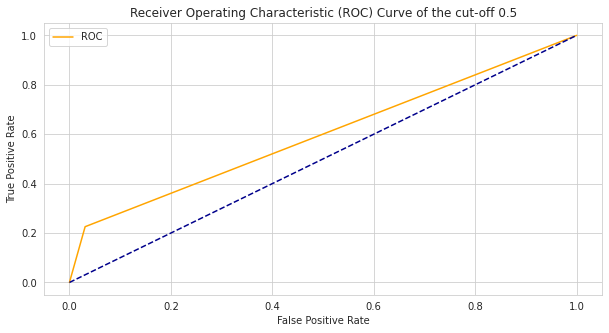

0.5973494529477644 is the Area Under the Curve



The classification report of this lr
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      1746
         1.0       0.60      0.23      0.33       359

    accuracy                           0.84      2105
   macro avg       0.73      0.60      0.62      2105
weighted avg       0.81      0.84      0.81      2105



In [108]:
# The logistic Regression Model gives us 84% accuracy, but very low recall, let's try other models to get a generalized type 1 and type 2 error.
eval_metrics(y_test, preds, 'lr', '0.5')

# ***Support Vector Machine Model***

In [109]:
from sklearn.svm import SVC

In [129]:
svc_classifier = SVC(C=2.0)

In [130]:
svc_classifier.fit(X_train, y_train)

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [131]:
svm_preds = svc_classifier.predict(X_test)

In [132]:
confusion_matrix(svm_preds,y_test)

array([[1689,  249],
       [  57,  110]])

Confusion Matrix of this model
[[1689   57]
 [ 249  110]]



Accuracy score of the svc_classifier model is 0.8546318289786223
f1 score of the svc_classifier model is 0.4182509505703422


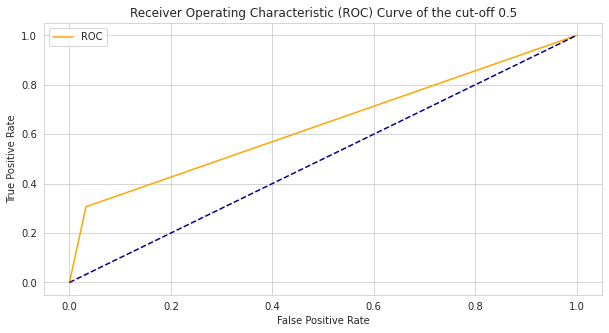

0.6368803185634017 is the Area Under the Curve



The classification report of this svc_classifier model
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1746
         1.0       0.66      0.31      0.42       359

    accuracy                           0.85      2105
   macro avg       0.77      0.64      0.67      2105
weighted avg       0.84      0.85      0.83      2105



In [135]:
eval_metrics(y_test, svm_preds, 'svc_classifier model', '0.5')

The SVM model is better than the LG model, but this has a precision issue. Trying a kernal SVM model

In [136]:
svc_kernal =  SVC(kernel= 'rbf', C=3, gamma = 0.1)

In [137]:
svc_kernal.fit(X_train,y_train)
preds = svc_kernal.predict(X_test)

Confusion Matrix of this model
[[1660   86]
 [ 230  129]]



Accuracy score of the svc_kernal is 0.8498812351543943
f1 score of the svc_kernal is 0.44947735191637633


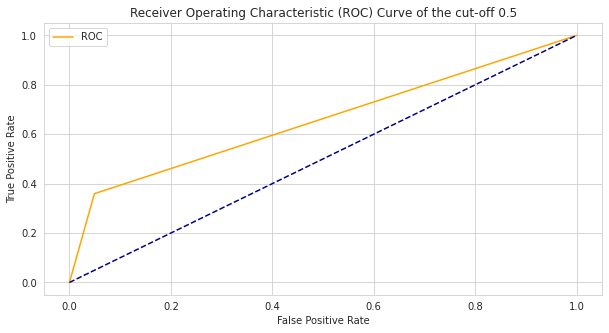

0.6550380176575507 is the Area Under the Curve



The classification report of this svc_kernal
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      1746
         1.0       0.60      0.36      0.45       359

    accuracy                           0.85      2105
   macro avg       0.74      0.66      0.68      2105
weighted avg       0.83      0.85      0.83      2105



In [139]:
eval_metrics(y_test, preds, 'svc_kernal', '0.5')

##### There is a steady raise on the typ1 and type 2 but they are not up to the mark.
##### Let's see how the randomforest model can fix it

# ***K Nearest Neighbours model***

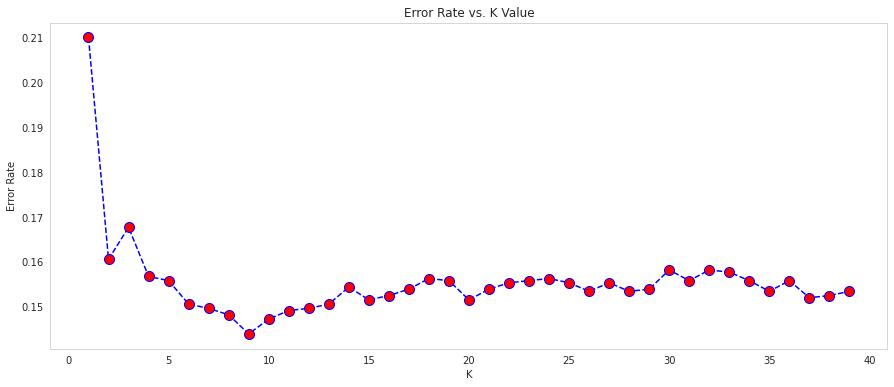

In [263]:
from sklearn.neighbors import KNeighborsClassifier

k_size = [1,2,3,4,5,6,7,8,9,10]

error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
  knn.fit(X_train, y_train)
  y_preds = knn.predict(X_test)
  error_rate.append(np.mean(y_preds != y_test))

plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()
plt.show()

Confusion Matrix of this model
[[1692   54]
 [ 249  110]]



Accuracy score of the KNN model (knn_final) is 0.8560570071258907
f1 score of the KNN model (knn_final) is 0.4206500956022945


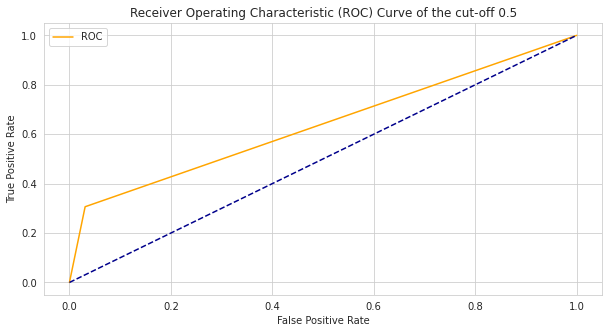

0.6377394250926113 is the Area Under the Curve



The classification report of this KNN model (knn_final)
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1746
         1.0       0.67      0.31      0.42       359

    accuracy                           0.86      2105
   macro avg       0.77      0.64      0.67      2105
weighted avg       0.84      0.86      0.83      2105



In [264]:
knn_final = KNeighborsClassifier(n_neighbors = 9, n_jobs= -1)
knn_final.fit(X_train, y_train)
preds = knn_final.predict(X_test)

eval_metrics(y_test, preds, 'KNN model (knn_final)', '0.5')

The KNN model has the best accuracy so far, but still the f1 score is not good enough

# ***Random Forest Model***




In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rclf = RandomForestClassifier(n_estimators= 200, criterion= 'entropy', n_jobs= -1)

In [142]:
rclf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [143]:
preds = rclf.predict(X_test)

Confusion Matrix of this model
[[1684   62]
 [ 228  131]]



Accuracy score of the rclf is 0.8622327790973872
f1 score of the rclf is 0.47463768115942023


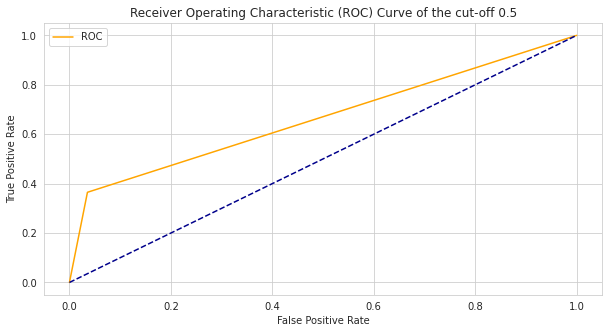

0.6646963852115619 is the Area Under the Curve



The classification report of this rclf
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1746
         1.0       0.68      0.36      0.47       359

    accuracy                           0.86      2105
   macro avg       0.78      0.66      0.70      2105
weighted avg       0.85      0.86      0.84      2105



In [146]:
eval_metrics(y_test, preds, 'rclf', '0.5')

In [158]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    #'bootstrap': [True, False],
    'max_depth': [110, 130, 150, 170, 200],
    'max_features': [2,4,6,8,10,12],
    'min_samples_leaf': [5, 10, 15,20,25],
    'min_samples_split': [10, 12, 14, 16, 18, 20],
    'n_estimators': [20,50]
}
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring = 'f1_micro')

In [159]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 12.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [160]:
grid_search.best_params_

{'max_depth': 110,
 'max_features': 10,
 'min_samples_leaf': 25,
 'min_samples_split': 12,
 'n_estimators': 20}

In [161]:
rclf_bp = RandomForestClassifier(bootstrap= False, max_depth= 110, max_features= 10, min_samples_leaf= 25, min_samples_split= 12,n_estimators= 20)

rclf_bp.fit(X_train, y_train)

preds = rclf_bp.predict(X_test)

Confusion Matrix of this model
[[1651   95]
 [ 197  162]]



Accuracy score of the rclf_bp is 0.8612826603325415
f1 score of the rclf_bp is 0.525974025974026


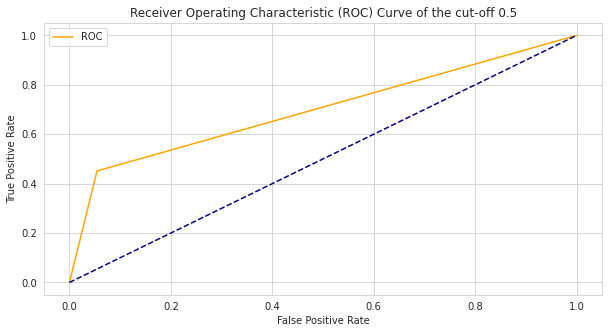

0.6984217008554372 is the Area Under the Curve



The classification report of this rclf_bp
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      1746
         1.0       0.63      0.45      0.53       359

    accuracy                           0.86      2105
   macro avg       0.76      0.70      0.72      2105
weighted avg       0.85      0.86      0.85      2105



In [162]:
eval_metrics(y_test, preds, 'rclf_bp','0.5')

# Both the accuracy and f1-score has shown a lift
# Now we can leverage the power of random forest and derive the KPIs of the target

In [163]:
rf_feature_importance = pd.DataFrame([rclf_bp.feature_importances_,np.array(X.columns)]).T.sort_values(by = 0, ascending = False) 
rf_feature_importance

,0,1
1,0.623471,city_development_index
0,0.171066,city
5,0.0660652,training_hours
3,0.0619828,experience
4,0.0221516,company_size
10,0.0108303,enrolled_university_no_enrollment
24,0.00762592,last_new_job_>4
2,0.00565588,education_level
8,0.00500298,relevent_experience_No relevent experience
21,0.00394347,last_new_job_2


KPIS for target

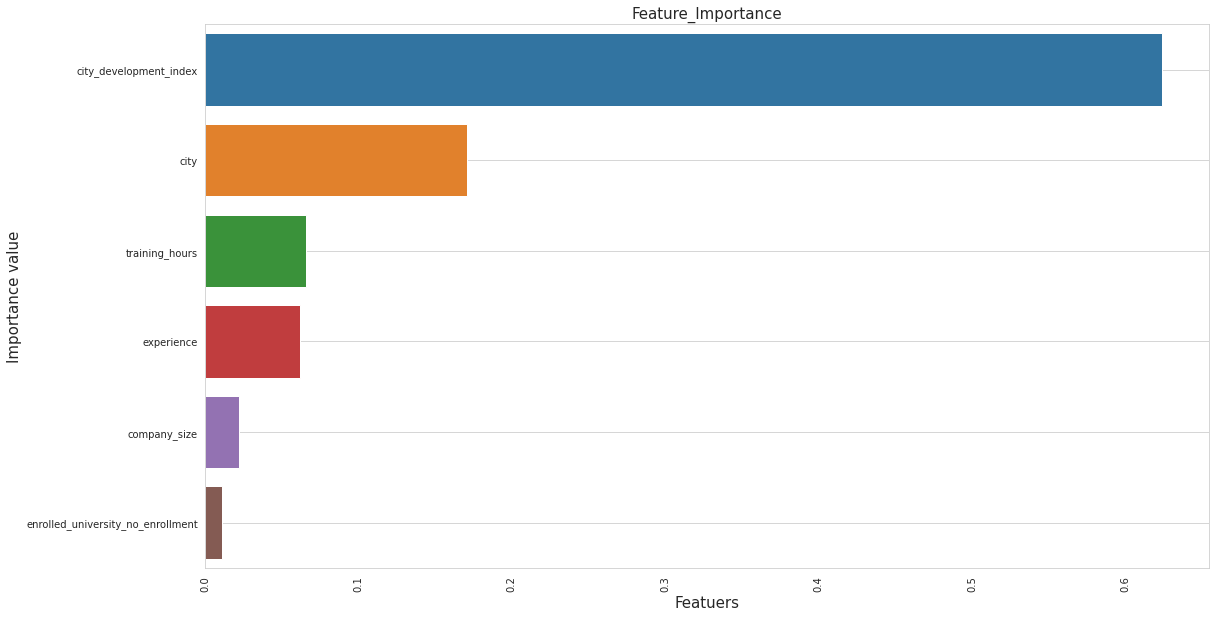

In [164]:
plt.figure(figsize = (18,10))
plt.title('Feature_Importance', fontsize = 15)
sns.barplot(x = rf_feature_importance[rf_feature_importance[0] > 0.009][0] , y = rf_feature_importance[rf_feature_importance[0] > 0.009][1], orient = 'h')
plt.grid()
plt.xticks(rotation = 90)
plt.xlabel('Featuers',fontsize = 15)
plt.ylabel('Importance value',fontsize = 15)
plt.show()

## ***Building the ANN model***

In [165]:
# ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [166]:
classifier = Sequential()

In [167]:
X_train.shape

(6312, 26)

In [168]:
classifier.add(Dense(units = 10, input_dim = 26, kernel_initializer= 'glorot_normal', activation= 'relu'))
classifier.add(Dense(units = 8, kernel_initializer= 'glorot_normal', activation= 'relu'))
classifier.add(Dense(units = 18, kernel_initializer= 'glorot_normal', activation= 'relu'))
classifier.add(Dense(units = 5, kernel_initializer= 'glorot_normal', activation= 'relu'))
classifier.add(Dense(units= 1, kernel_initializer='glorot_normal', activation= 'sigmoid'))
classifier.compile(optimizer='Adamax', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [169]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 18)                162       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 95        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [170]:
classifier.fit(X_train, y_train, validation_split= 0.28, epochs= 200, batch_size= 264)

Epoch 1/200
18/18 [==============================] - 1s 23ms/step - loss: 0.5495 - accuracy: 0.8328 - val_loss: 0.5148 - val_accuracy: 0.8292
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4929 - accuracy: 0.8411 - val_loss: 0.4925 - val_accuracy: 0.8292
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4976 - accuracy: 0.8313 - val_loss: 0.4811 - val_accuracy: 0.8292
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4792 - accuracy: 0.8387 - val_loss: 0.4733 - val_accuracy: 0.8292
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4546 - accuracy: 0.8463 - val_loss: 0.4675 - val_accuracy: 0.8292
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4524 - accuracy: 0.8410 - val_loss: 0.4628 - val_accuracy: 0.8292
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4571 - accuracy: 0.8348 - val_loss: 0.4588 - val_accuracy: 0.8292
Epoch 8/200


In [171]:
preds = classifier.predict(X_test)

In [172]:
preds = (preds>0.5)

In [173]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [174]:
accuracy_score(preds, y_test)

0.8574821852731591

Confusion Matrix of this model
[[1690   56]
 [ 244  115]]



Accuracy score of the classifier (ANN base model) is 0.8574821852731591
f1 score of the classifier (ANN base model) is 0.4339622641509434


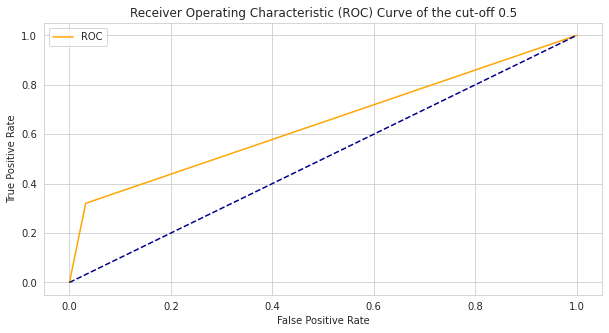

0.6441304757073071 is the Area Under the Curve



The classification report of this classifier (ANN base model)
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1746
         1.0       0.67      0.32      0.43       359

    accuracy                           0.86      2105
   macro avg       0.77      0.64      0.68      2105
weighted avg       0.84      0.86      0.84      2105



In [177]:
eval_metrics(y_test, preds, 'classifier (ANN base model)', '0.5')

The Base ANN model has given 85% accuracy, let's try to perform some hyperparameter tuning

In [176]:
pip install -U keras-tuner

     |████████████████████████████████| 71kB 3.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=8f719092207278e2592cd5b3a18793756f94f23a5c8946f2739037eafb00ef85
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=4edcb60de8095b8ede61e1d2b9970295a66ed1a16bc157b7fed3c4aa7eed2c3a
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [178]:
from kerastuner.tuners import RandomSearch

In [179]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [180]:
def build_model(hp):
    model = keras.Sequential()
    # hp.Int creates the hidden layers using 'num_layers'
    for i in range(hp.Int('num_layers', 1, 20)): 
        # Second Hyperparameter : Number of neurons we should have in each hidden layer
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=5,
                                            max_value=50,
                                            step=32),
                               activation=hp.Choice('activation_', ['relu','sigmoid','elu','tanh'])))
    model.add(layers.Dense(units = 1, kernel_initializer='glorot_normal' ,activation='sigmoid'))
    model.compile(
        optimizer='Adamax',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

    #hp.Int - tires all options
    #hp.Choice - Chooses one out of the options

In [181]:
tuner = RandomSearch(
    # Hyperparameters passed
    build_model, 
    # Based on what you want to pick the best
    objective='val_accuracy',
    # Max trials
    max_trials=5,
    # Trails per execution
    executions_per_trial=5)

In [182]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 50, 'step': 32, 'sampling': None}
activation_ (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'elu', 'tanh'], 'ordered': False}


In [183]:
tuner.search(X_train, y_train, epochs = 200, validation_data = (X_test, y_test))

Trial 5 Complete [00h 09m 04s]
val_accuracy: 0.829453706741333

Best val_accuracy So Far: 0.8697387099266052
Total elapsed time: 00h 38m 28s
INFO:tensorflow:Oracle triggered exit


In [184]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 2
units_0: 37
activation_: elu
units_1: 37
units_2: 37
units_3: 37
units_4: 5
units_5: 37
units_6: 37
units_7: 37
units_8: 5
units_9: 37
units_10: 5
units_11: 5
units_12: 37
units_13: 37
units_14: 5
units_15: 37
units_16: 37
units_17: 37
Score: 0.8697387099266052
Trial summary
Hyperparameters:
num_layers: 5
units_0: 37
activation_: relu
units_1: 37
units_2: 5
units_3: 37
units_4: 37
units_5: 37
units_6: 37
units_7: 5
units_8: 37
units_9: 37
units_10: 5
units_11: 37
units_12: 37
units_13: 37
units_14: 37
units_15: 5
units_16: 37
units_17: 37
Score: 0.8683135390281678
Trial summary
Hyperparameters:
num_layers: 8
units_0: 5
activation_: relu
units_1: 5
units_2: 5
units_3: 5
units_4: 5
units_5: 5
units_6: 5
units_7: 5
Score: 0.8618527412414551
Trial summary
Hyperparameters:
num_layers: 18
units_0: 37
activation_: relu
units_1: 5
uni

In [ ]:
X_train.shape

In [197]:
# Implementing the best results into a model
tuner_Classifier = Sequential()
tuner_Classifier.add(Dense(input_dim = 26, kernel_initializer= 'glorot_normal', activation= 'elu', units = 37))
tuner_Classifier.add(Dense( kernel_initializer= 'glorot_normal', activation= 'elu', units = 37))
tuner_Classifier.add(Dense( kernel_initializer= 'glorot_normal', activation= 'elu', units = 37))
#tuner_Classifier.add(Dense( kernel_initializer= 'glorot_normal', activation= 'sigmoid', units = 37))
#tuner_Classifier.add(Dense( kernel_initializer= 'glorot_normal', activation= 'sigmoid', units = 37))
#tuner_Classifier.add(Dense( kernel_initializer= 'glorot_normal', activation= 'sigmoid', units = 37))
#tuner_Classifier.add(Dense( kernel_initializer= 'glorot_normal', activation= 'sigmoid', units = 5))
tuner_Classifier.add(Dense( kernel_initializer= 'glorot_normal', activation= 'sigmoid', units = 1))
tuner_Classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [198]:
tuner_Classifier.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 37)                999       
_________________________________________________________________
dense_41 (Dense)             (None, 37)                1406      
_________________________________________________________________
dense_42 (Dense)             (None, 37)                1406      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 38        
Total params: 3,849
Trainable params: 3,849
Non-trainable params: 0
_________________________________________________________________


In [199]:
tuner_Classifier.fit(X_train, y_train, validation_split= 0.25, epochs = 200, batch_size= 124)

Epoch 1/200
39/39 [==============================] - 1s 7ms/step - loss: 0.5905 - accuracy: 0.7086 - val_loss: 0.4591 - val_accuracy: 0.8283
Epoch 2/200
39/39 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.8372 - val_loss: 0.4068 - val_accuracy: 0.8371
Epoch 3/200
39/39 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8476 - val_loss: 0.3944 - val_accuracy: 0.8397
Epoch 4/200
39/39 [==============================] - 0s 3ms/step - loss: 0.3884 - accuracy: 0.8422 - val_loss: 0.3886 - val_accuracy: 0.8409
Epoch 5/200
39/39 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.8444 - val_loss: 0.3879 - val_accuracy: 0.8397
Epoch 6/200
39/39 [==============================] - 0s 3ms/step - loss: 0.3742 - accuracy: 0.8519 - val_loss: 0.3876 - val_accuracy: 0.8416
Epoch 7/200
39/39 [==============================] - 0s 3ms/step - loss: 0.3816 - accuracy: 0.8456 - val_loss: 0.3870 - val_accuracy: 0.8403
Epoch 8/200
3

In [232]:
new_pred = tuner_Classifier.predict(X_test)

In [233]:
new_preds = (new_pred > 0.5)

Confusion Matrix of this model
[[1670   76]
 [ 233  126]]



Accuracy score of the ANN with best params is 0.8532066508313539
f1 score of the ANN with best params is 0.44919786096256686


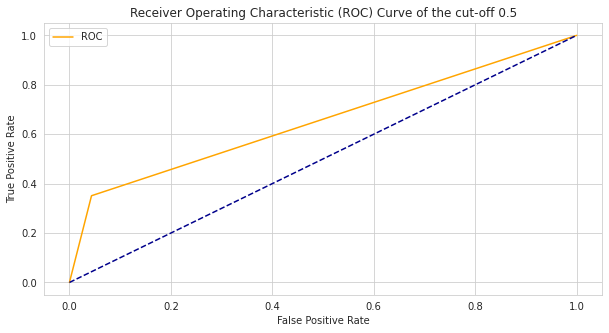

0.653723433107748 is the Area Under the Curve



The classification report of this ANN with best params
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1746
         1.0       0.62      0.35      0.45       359

    accuracy                           0.85      2105
   macro avg       0.75      0.65      0.68      2105
weighted avg       0.83      0.85      0.84      2105



In [235]:
eval_metrics(y_test, new_preds, 'ANN with best params', '0.5')

In [236]:
# We have sccessfully tweaked the test accuracy, 
# let's see what opportunities we have with respect to the cut of to tweak the model with respect to the precision and recall

In [237]:
# Optimal Cut-off finder

# Imports for Imbaku's Den
from sklearn.metrics import auc, roc_auc_score, roc_curve


#fpr, tpr, thresh = roc_curve(y_test, preds)


tresh = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,]

def The_Imbakus_Den(x , y_test, new_pred):

  from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score

  tresh = x
  auc_4_tresh = {}
  roc_auc_curve_4_tresh = {}
  recall_4_tresh = {}
  precision_4_tresh = {}
  accuracy_4_tresh = {}
  f1_4_tresh = {}
  for i in tresh:
    y_preds = (new_pred > i)
    fpr, tpr, thresh = roc_curve(y_test, y_preds)
    roc_auc_curve_4_tresh[i] = roc_curve(y_test, y_preds)
    plot_roc_curve(fpr,tpr, str(i))
    auc_4_tresh[i] = auc(fpr,tpr)
    recall_4_tresh[i] = recall_score(y_preds, y_test)
    precision_4_tresh[i] = precision_score(y_preds, y_test)
    f1_4_tresh[i] = f1_score(y_preds, y_test)
    accuracy_4_tresh[i] = accuracy_score(y_preds, y_test)

  auc_4_thresh = pd.DataFrame(auc_4_tresh, index = ['AUC']).T
  accuracy_4_thresh = pd.DataFrame(accuracy_4_tresh, index = ['Accuracy']).T
  f1_score_4_thresh = pd.DataFrame(f1_4_tresh, index = ['f1_score']).T
  Precision_4_thresh = pd.DataFrame(precision_4_tresh, index = ['Precsion']).T
  Recall_4_thresh = pd.DataFrame(recall_4_tresh, index = ['Recall']).T

  for i in [auc_4_thresh, accuracy_4_thresh, f1_score_4_thresh, Precision_4_thresh, Recall_4_thresh]:
    plt.figure(figsize=(18,5))
    sns.barplot(x = i.index, y = i.iloc[:,0])
    plt.title(i.columns[0])
    plt.xlabel("Cut offs")
    plt.show()
    print("\n\n")

  return auc_4_thresh,accuracy_4_thresh,f1_score_4_thresh,Precision_4_thresh,Recall_4_thresh


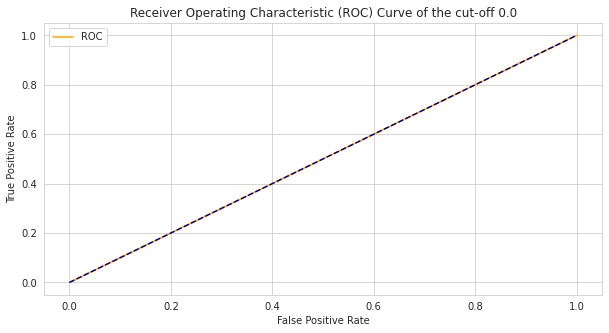

0.5 is the Area Under the Curve





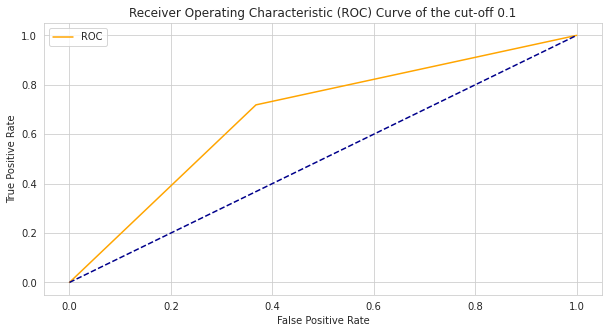

0.6754826790722607 is the Area Under the Curve





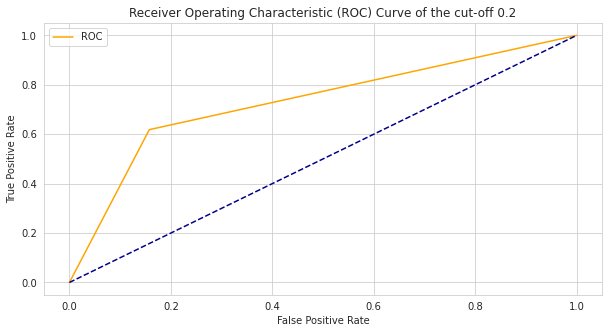

0.7304407687128878 is the Area Under the Curve





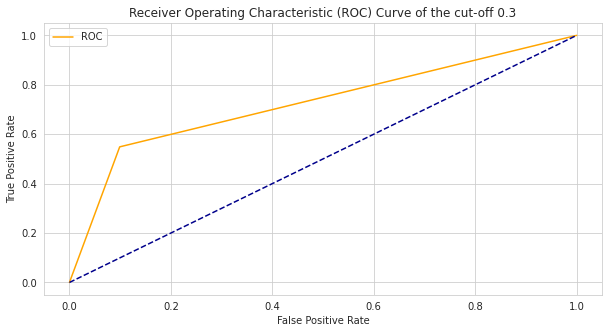

0.7248314492018366 is the Area Under the Curve





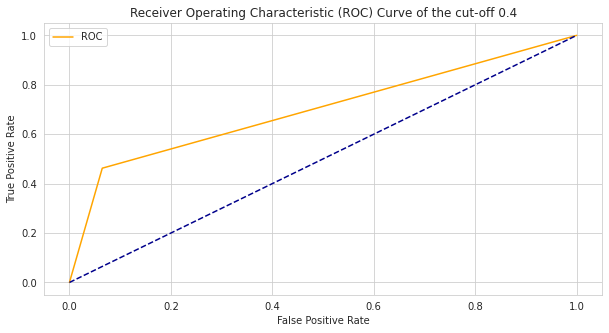

0.698838092320848 is the Area Under the Curve





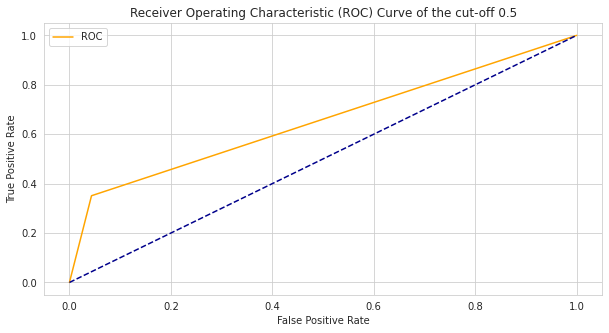

0.653723433107748 is the Area Under the Curve





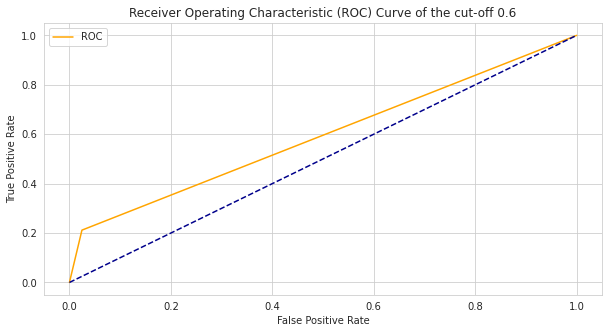

0.5935357219206973 is the Area Under the Curve





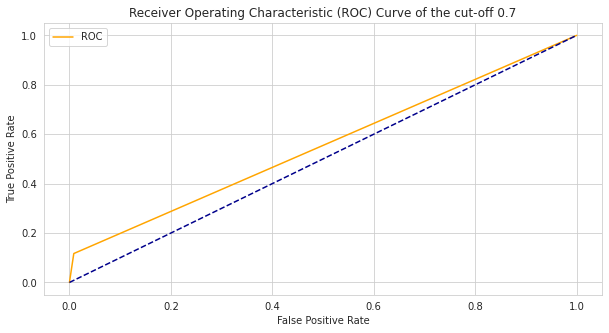

0.5542002890809714 is the Area Under the Curve





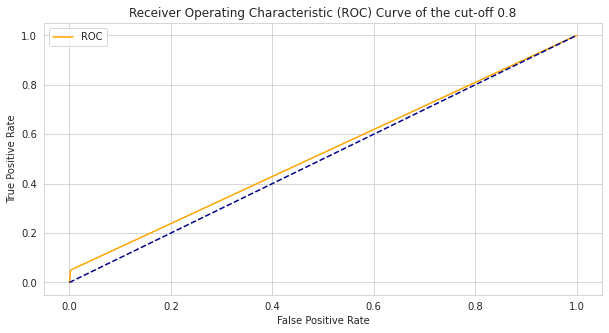

0.5239241625107288 is the Area Under the Curve





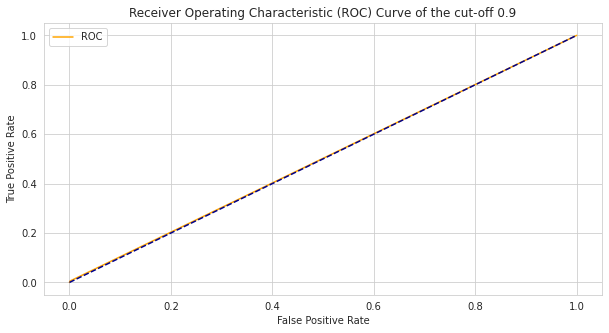

0.5022127776341945 is the Area Under the Curve





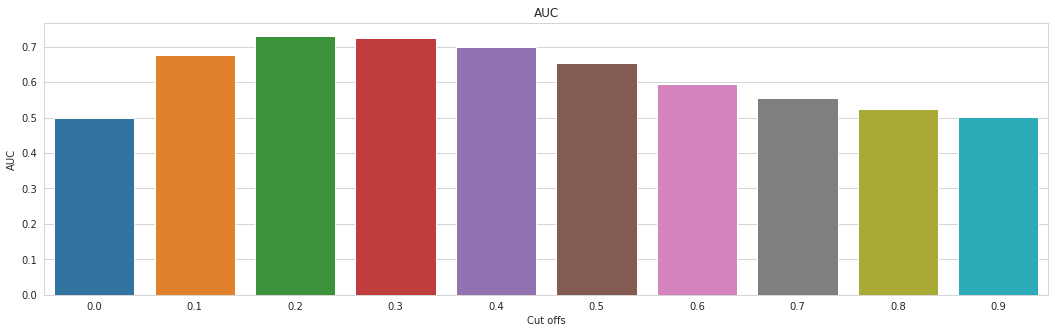

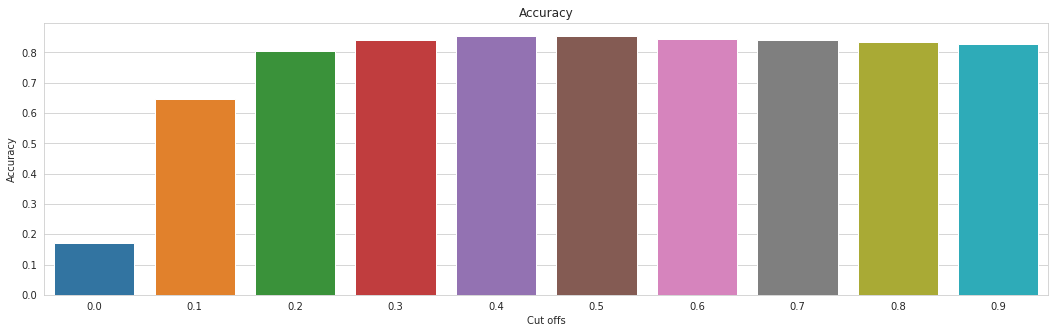

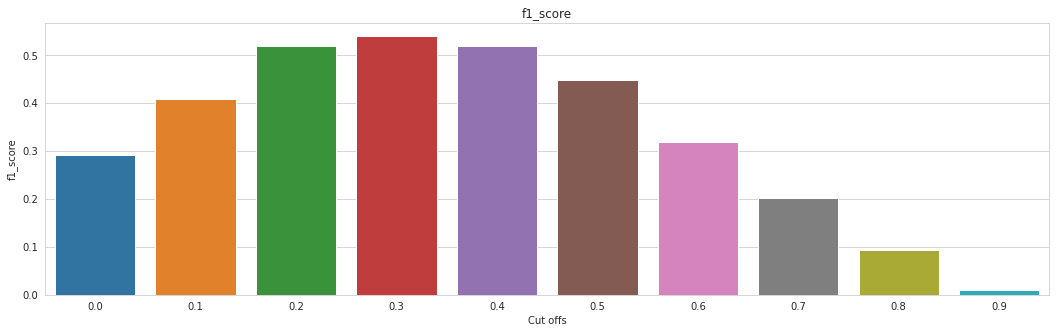

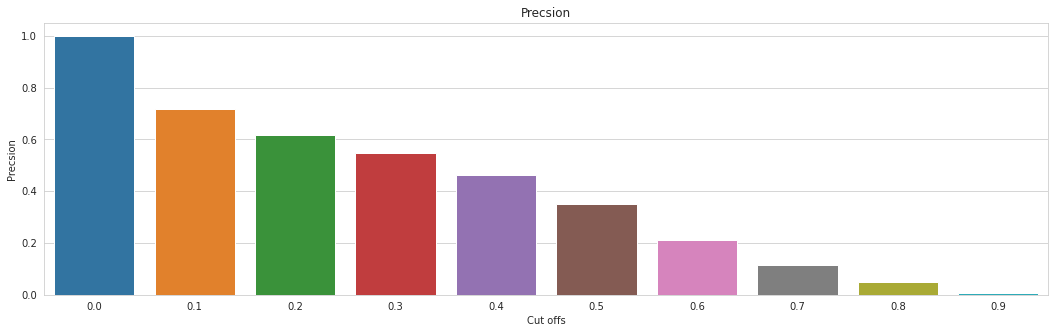

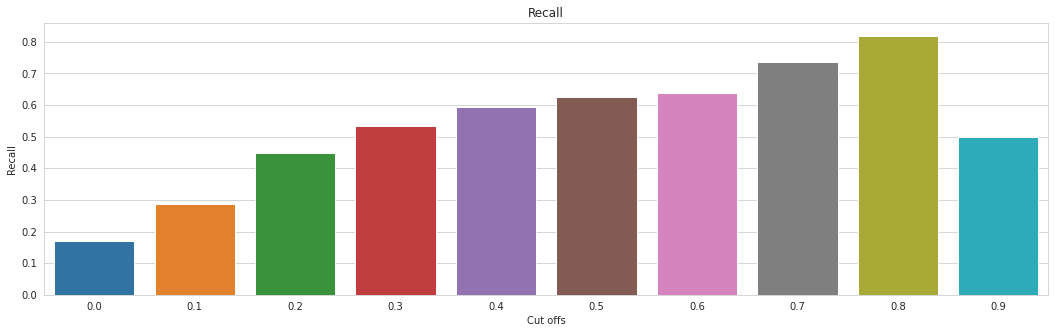

In [238]:
new_pred = tuner_Classifier.predict(X_test)
Auc, acc, f1, pres, rec = The_Imbakus_Den(tresh,y_test, new_pred)

In [239]:
Cut_off_wise_eval_df = pd.concat([Auc, acc, f1, pres, rec] , axis = 1)

In [240]:
Cut_off_wise_eval_df

,AUC,Accuracy,f1_score,Precsion,Recall
0.0,0.500000,0.170546,0.291396,1.000000,0.170546
0.1,0.675483,0.647031,0.409849,0.718663,0.286667
0.2,0.730441,0.804276,0.518692,0.618384,0.446680
0.3,0.724831,0.840855,0.540466,0.548747,0.532432
0.4,0.698838,0.854632,0.520376,0.462396,0.594982
0.5,0.653723,0.853207,0.449198,0.350975,0.623762
0.6,0.593536,0.845131,0.317992,0.211699,0.638655
0.7,0.554200,0.842280,0.201923,0.116992,0.736842
0.8,0.523924,0.836105,0.094488,0.050139,0.818182
0.9,0.502213,0.829454,0.011019,0.005571,0.500000


***# Now we can select the optimal cutt off as 0.4, since it give gives the best results on accuracy, f1_score, precision and recall***

In [241]:
new_preds = (new_pred > 0.4)

Confusion Matrix of this model
[[1633  113]
 [ 193  166]]



Accuracy score of the ANN Hyperparameters tuned is 0.8546318289786223
f1 score of the ANN Hyperparameters tuned is 0.5203761755485893


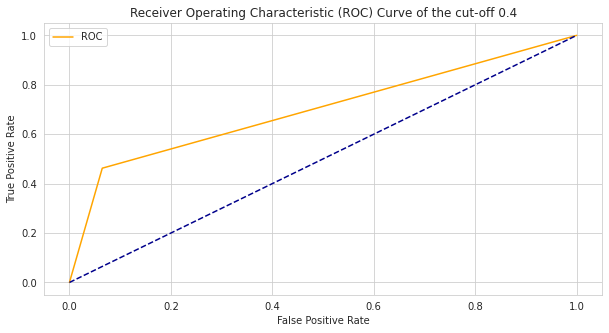

0.698838092320848 is the Area Under the Curve



The classification report of this ANN Hyperparameters tuned
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      1746
         1.0       0.59      0.46      0.52       359

    accuracy                           0.85      2105
   macro avg       0.74      0.70      0.72      2105
weighted avg       0.84      0.85      0.85      2105



In [243]:
eval_metrics(y_test,new_preds, 'ANN Hyperparameters tuned', '0.4')

# ***From all the models built above the rclf_bp model has the best evaluation metrics. So I'm selecting the Randomforest Model for drawing predictions on the new data***

# **Increasing the bandwidth of the training data to predict the real data**

In [244]:
new_X = np.concatenate([X_train, X_test])
new_y = np.concatenate([y_train, y_test])

In [245]:
rclf_bp.fit(new_X, new_y)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=110, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [258]:
files.upload()

In [247]:
test_dataset = pd.read_csv('aug_test.csv')

In [248]:
# Preprocessing the test data
ml_df_t = test_dataset.copy()

In [249]:

ml_df_t = pd.get_dummies(ml_df_t, columns=['gender'],prefix='gender',drop_first=True)
ml_df_t = pd.get_dummies(ml_df_t, columns=['relevent_experience'],prefix='relevent_experience',drop_first=True)
ml_df_t = pd.get_dummies(ml_df_t, columns=['enrolled_university'],prefix='enrolled_university',drop_first=True)
ml_df_t = pd.get_dummies(ml_df_t, columns=['major_discipline'],prefix='major_discipline',drop_first=True)
ml_df_t = pd.get_dummies(ml_df_t, columns=['company_type'],prefix='company_type',drop_first=True)
ml_df_t = pd.get_dummies(ml_df_t, columns=['last_new_job'],prefix='last_new_job',drop_first=True)

In [250]:
ml_df_t['education_level'].replace({'Graduate':0,'Masters':1, 'PhD':2}, inplace = True)
ml_df_t['education_level'] = ml_df_t['education_level'].astype('category')
ml_df_t['education_level'] = ml_df_t['education_level'].cat.codes

In [251]:
ml_df_t['experience'].replace({'<1':'0','>20':'20'}, inplace = True)
ml_df_t['experience'] = ml_df_t['experience'].astype('category')
ml_df_t['experience'] = ml_df_t['experience'].cat.codes

In [252]:
ml_df_t['company_size'].replace({'50-99':'2', '<10':'0', '5000-9999':'6', '1000-4999':'5', '10/49':'1', '100-500':'3','10000+':'7', '500-999':'4'}, inplace = True)
ml_df_t['company_size'] = ml_df_t['company_size'].astype('category')
ml_df_t['company_size'] = ml_df_t['company_size'].cat.codes

In [253]:
ml_df_t['city'] = ml_df_t['city'].astype('category')
ml_df_t['city'] = ml_df_t['city'].cat.codes

In [254]:
ml_df_t.drop('enrollee_id', axis = 1, inplace = True)

In [255]:
test = ss.transform(ml_df_t)

In [256]:
final_preds = rclf_bp.predict(test)

In [257]:
Submission = pd.concat([test_dataset['enrollee_id'], pd.DataFrame(final_preds, columns=['Target'])], axis = 1)

In [258]:
Submission

,enrollee_id,Target
0,32403,0.0
1,9858,0.0
2,31806,1.0
3,27385,0.0
4,27724,0.0
...,...,...
2124,1289,0.0
2125,195,0.0
2126,31762,0.0
2127,7873,0.0
